# Comparison of h$_\infty$ and h$_{\tau}$ variables in Na-current formulas in our wirk and Rothman'93

### There is a mistake in our Na-current in temperature correction. We have 10^((T-33)/10) at one term of h variables, whereas Rothman'93 has 10^((T-22)/10). With T=37 the temp coefficients are ~ 35 and 2.5 accordingly

In [3]:
import numpy as np
%pylab inline
style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [32]:
v = np.linspace(-100,0,800)

In [33]:
T=37
def qt(q,cel):
    return q**(float(T-cel)/10.)

In [34]:
# Our eqns
# def hlp_oz(v): # equal to Rothman'12 aplha_h
#     return 2.4*qt(3,22)/(1+exp((v+68)/3)) + 0.8*qt(10,33)/(1+exp(v+61.3))

def hinf_oz(v):
    return 2.4*qt(3,22)/(1+exp((v+68)/3)) + 0.8*qt(10,33)/(1+exp(v+61.3))/(2.4*qt(3,22)/(1+exp((v+68)/3)) + 0.8*qt(10,33)/(1+exp(v+61.3)) + 3.6*qt(3,22)/(1+exp(-(v+21)/10)))

def htau_oz(v):
    return 1/(2.4*qt(3,22)/(1+exp((v+68)/3)) + 0.8*qt(10,33)/(1+exp(v+61.3)) + 3.6*qt(3,22)/(1+exp(-(v+21)/10)))

In [35]:
# # Rothman'12 eqns
# def hlp_rot(v): # equal to Rothman'12 aplha_h
#     return 2.4*qt(3,22)/(1+exp((v+68)/3)) + 0.8*qt(10,22)/(1+exp(v+61.3))

def hinf_rot(v):
    return 2.4*qt(3,22)/(1+exp((v+68)/3)) + 0.8*qt(10,22)/(1+exp(v+61.3))/(2.4*qt(3,22)/(1+exp((v+68)/3)) + 0.8*qt(10,22)/(1+exp(v+61.3)) + 3.6*qt(3,22)/(1+exp(-(v+21)/10)))

def htau_rot(v):
    return 1/(2.4*qt(3,22)/(1+exp((v+68)/3)) + 0.8*qt(10,22)/(1+exp(v+61.3)) + 3.6*qt(3,22)/(1+exp(-(v+21)/10)))

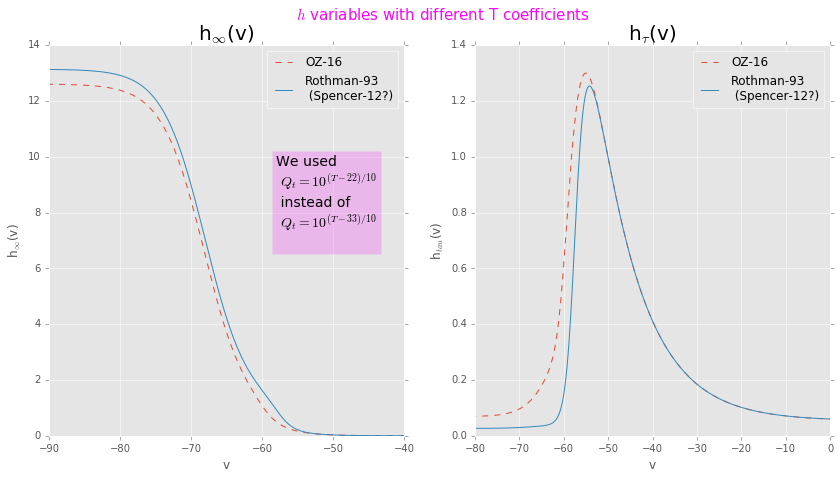

In [107]:
f, axs = subplots(1,2, figsize=(14,7))
axs[0].plot(v,hinf_oz(v),'--', label='OZ-16')
axs[0].plot(v,hinf_rot(v), label='Rothman-93\n (Spencer-12?)')
axs[0].set_title('h$_{\infty}$(v)', fontsize=20)
axs[0].set_ylabel('h$_\infty$(v)')
axs[0].set_xlabel('v')
axs[0].legend()
axs[0].set_xlim(-90,-40)

axs[1].plot(v,htau_oz(v),'--', label='OZ-16')
axs[1].plot(v,htau_rot(v), label='Rothman-93\n (Spencer-12?)')
axs[1].set_title('h$_{\\tau}$(v)', fontsize=20)
axs[1].set_ylabel('h$_{tau}$(v)')
axs[1].set_xlabel('v')
axs[1].legend()
axs[1].set_xlim(-80,0)

f.text(0.37, 0.95, '$h$ variables with different T coefficients', fontsize=15, color='magenta')
f.text(0.35, 0.5, 'We used\n $Q_t=10^{(T-22)/10}$\n instead of\n $Q_t=10^{(T-33)/10}$\n', fontsize=14, bbox=dict(facecolor='magenta', alpha=0.2))
f.savefig('CompareI_Na_s.pdf')

## $\dot{h}h_{\tau}=h_\infty-h$